# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student surname: Giorgetti

Student name: Sabrina
    
ID: 2013375

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import pandas as pd #added
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2013375 # place a random seed
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600 #600 to start, can be changed
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [57 50 68 73 51 68 64 51 61 57]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


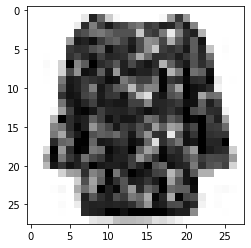

LABEL: 6
INPUT:


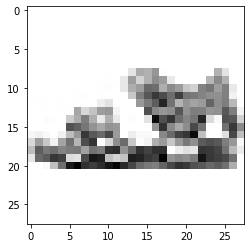

LABEL: 5
INPUT:


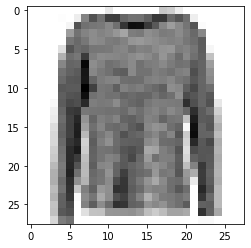

LABEL: 2
INPUT:


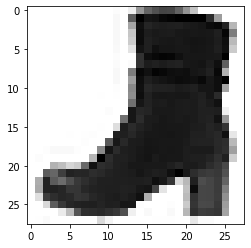

LABEL: 9


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#train linear SVM

# ADD YOUR CODE
svc = SVC(kernel='linear')
grid = GridSearchCV(estimator=svc, param_grid=parameters, cv=4)
grid.fit(X_train,y_train)

result_df = pd.DataFrame(grid.cv_results_)
#print(result_df)
print("\n")

print ('RESULTS FOR LINEAR KERNEL')
print("Best parameters set found:", grid.best_params_ ) # ADD YOUR CODE
print("Score with best parameters:", "{0:0.3f}".format(grid.best_score_)) # ADD YOUR CODE
print("\n") 

print("All scores on the grid \n", result_df[['params','split0_test_score','split1_test_score','split2_test_score', 'split3_test_score','mean_test_score', 'rank_test_score']]) # ADD YOUR CODE
print("\n") 





RESULTS FOR LINEAR KERNEL
Best parameters set found: {'C': 0.1}
Score with best parameters: 0.803


All scores on the grid 
          params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.001}           0.513333           0.546667           0.520000   
1   {'C': 0.01}           0.793333           0.780000           0.786667   
2    {'C': 0.1}           0.833333           0.800000           0.793333   
3      {'C': 1}           0.813333           0.773333           0.786667   
4     {'C': 10}           0.813333           0.773333           0.786667   
5    {'C': 100}           0.813333           0.773333           0.786667   

   split3_test_score  mean_test_score  rank_test_score  
0           0.560000         0.535000                6  
1           0.720000         0.770000                5  
2           0.786667         0.803333                1  
3           0.766667         0.785000                2  
4           0.766667         0.785000                2 

## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of degree 2 kernel

# ADD YOUR CODE
svc = SVC(kernel='poly', degree=2)  #NEED TO SPECIFY DEGREEE
grid_poly = GridSearchCV(estimator=svc, param_grid=parameters, cv=4)
grid_poly.fit(X_train,y_train)

result_poly_df = pd.DataFrame(grid_poly.cv_results_)
#print(result_poly_df) 
print("\n")


print ('RESULTS FOR POLY DEGREE=2 KERNEL')
print("Best parameters set found:", grid_poly.best_params_)# ADD YOUR CODE
print("Score with best parameters:", "{0:0.3f}".format(grid_poly.best_score_))# ADD YOUR CODE
print("\n") 

print("All scores on the grid \n", result_poly_df[['params','split0_test_score','split1_test_score','split2_test_score', 'split3_test_score','mean_test_score', 'rank_test_score']]) # ADD YOUR CODE





RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found: {'C': 0.05, 'gamma': 0.5}
Score with best parameters: 0.783


All scores on the grid 
                        params  split0_test_score  split1_test_score  \
0  {'C': 0.05, 'gamma': 0.05}           0.766667           0.773333   
1   {'C': 0.05, 'gamma': 0.5}           0.780000           0.773333   
2   {'C': 0.05, 'gamma': 5.0}           0.780000           0.773333   
3   {'C': 0.5, 'gamma': 0.05}           0.793333           0.773333   
4    {'C': 0.5, 'gamma': 0.5}           0.780000           0.773333   
5    {'C': 0.5, 'gamma': 5.0}           0.780000           0.773333   
6     {'C': 5, 'gamma': 0.05}           0.780000           0.773333   
7      {'C': 5, 'gamma': 0.5}           0.780000           0.773333   
8      {'C': 5, 'gamma': 5.0}           0.780000           0.773333   

   split2_test_score  split3_test_score  mean_test_score  rank_test_score  
0           0.786667           0.726667         0.763333        

## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 4th degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of higher degree kernel
degree = 4

# ADD YOUR CODE
svc = SVC(kernel='poly', degree=4) 
grid_poly4 = GridSearchCV(estimator=svc, param_grid=parameters, cv=4)
grid_poly4.fit(X_train,y_train)

result_poly4_df = pd.DataFrame(grid_poly4.cv_results_)
#print(result_poly4_df) 
print("\n")

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:",  grid_poly4.best_params_)# ADD YOUR CODE
print("Score with best parameters:", "{0:0.3f}".format(grid_poly4.best_score_))  # ADD YOUR CODE
print("\n") 

print("All scores on the grid \n", result_poly4_df[['params','split0_test_score','split1_test_score','split2_test_score', 'split3_test_score','mean_test_score', 'rank_test_score']]) # ADD YOUR CODE






RESULTS FOR POLY DEGREE= 4  KERNEL
Best parameters set found: {'C': 0.05, 'gamma': 0.05}
Score with best parameters: 0.740


All scores on the grid 
                        params  split0_test_score  split1_test_score  \
0  {'C': 0.05, 'gamma': 0.05}           0.760000           0.740000   
1   {'C': 0.05, 'gamma': 0.5}           0.713333           0.706667   
2   {'C': 0.05, 'gamma': 5.0}           0.713333           0.706667   
3   {'C': 0.5, 'gamma': 0.05}           0.706667           0.706667   
4    {'C': 0.5, 'gamma': 0.5}           0.713333           0.706667   
5    {'C': 0.5, 'gamma': 5.0}           0.713333           0.706667   
6     {'C': 5, 'gamma': 0.05}           0.713333           0.706667   
7      {'C': 5, 'gamma': 0.5}           0.713333           0.706667   
8      {'C': 5, 'gamma': 5.0}           0.713333           0.706667   

   split2_test_score  split3_test_score  mean_test_score  rank_test_score  
0           0.733333           0.726667         0.740000     

## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel

# ADD YOUR CODE
svc_g = SVC(kernel='rbf')
grid_rbf = GridSearchCV(estimator=svc_g, param_grid=parameters, cv=4)
grid_rbf.fit(X_train,y_train)

result_rbf_df = pd.DataFrame(grid_rbf.cv_results_)
#print(result_rbf_df)
print("\n")


print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:", grid_rbf.best_params_)# ADD YOUR CODE

print("Score with best parameters:", "{0:0.3f}".format(grid_rbf.best_score_))# ADD YOUR CODE

print("\n All scores on the grid \n", result_rbf_df[['params','split0_test_score','split1_test_score','split2_test_score', 'split3_test_score','mean_test_score', 'rank_test_score']]) # ADD YOUR CODE







RESULTS FOR rbf KERNEL
Best parameters set found: {'C': 5, 'gamma': 0.005}
Score with best parameters: 0.805

 All scores on the grid 
                         params  split0_test_score  split1_test_score  \
0   {'C': 0.5, 'gamma': 0.005}           0.733333           0.726667   
1    {'C': 0.5, 'gamma': 0.05}           0.693333           0.726667   
2     {'C': 0.5, 'gamma': 0.5}           0.120000           0.120000   
3       {'C': 0.5, 'gamma': 5}           0.120000           0.120000   
4     {'C': 5, 'gamma': 0.005}           0.846667           0.786667   
5      {'C': 5, 'gamma': 0.05}           0.760000           0.800000   
6       {'C': 5, 'gamma': 0.5}           0.126667           0.126667   
7         {'C': 5, 'gamma': 5}           0.120000           0.120000   
8    {'C': 50, 'gamma': 0.005}           0.833333           0.786667   
9     {'C': 50, 'gamma': 0.05}           0.760000           0.800000   
10     {'C': 50, 'gamma': 0.5}           0.126667           0.126667  

## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

When using the different kernels on this dataset we observe: <br>

-Linear kernel: the best parameter found is {'C': 0.1} with a score equal to 0.803 <br>
-Polynomial of 2 degree kernel:  the best parameters found are {'C': 0.05, 'gamma': 0.5} with a score equal to 0.783 <br>
-Polynomial of 4 degree kernel: the best parameters found are {'C': 0.05, 'gamma': 0.05} with a score equal to 0.740 <br>
-Rbf kernel : the best parameters found are {'C': 5, 'gamma': 0.005} with a score equal to 0.805 <br>

From this results we can see that the best one is obtained in the rbf case; the linear kernel also works well. We instead get the worst result with the polynomial kernel with 4 degree. 


## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
best_SVM = GridSearchCV(estimator=svc_g, param_grid={'C': [5], 'gamma': [0.005]}, cv=4) # USE YOUR OPTIMAL PARAMETERS
#The best model is rbf with {'C': 5, 'gamma': 0.005} as best parameters

# ADD YOUR CODE

best_SVM.fit(X_train,y_train)

predict_best_SVM = best_SVM.predict(X_test) #y_predict
#print(skm.classification_report(y_test,predict_best_SVM))

train_score=best_SVM.best_estimator_.score(X_train , y_train)
training_error= (1-train_score)

# (error is 1 - svm.score)
test_score=best_SVM.best_estimator_.score(X_test , y_test)
test_error= (1-test_score)

print ("Best SVM training error: %f " % training_error)
print ("Best SVM test error: %f " % test_error)

Best SVM training error: 0.056667 
Best SVM test error: 0.202750 


## TO DO 6

Analyze how the classification boundaries depend on the C parameter

In [13]:
# Function to plot the data and classification boundaries. 


def plot_data(model, X_train, y_train, X_test, y_test, train_error, test_error, C):
    #modified adding C in order to print the plot title (was getting an error)

    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - abs(0.1*x.min()), x.max() + abs(0.1*x.min())
        y_min, y_max = y.min() - abs(0.1*y.min()), y.max() + abs(0.1*y.min())
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out
    
    
    
    # Plot
    fig, ax = plt.subplots(1,2,figsize=(15,5))

    # Training set
    X0, X1 = X_train_pca[:, 0], X_train_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[0], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[0].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[0].set_xticks(())
    ax[0].set_yticks(())
    ax[0].set_title('Training data, C={:.0e}, model accuracy={:.3f}'.format(C,1-train_error))
    #modified in order to print the plot title (was getting an error)

    # Test set
    X0, X1 = X_test_pca[:, 0], X_test_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[1], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[1].scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[1].set_xticks(())
    ax[1].set_yticks(())
    ax[1].set_title('Test data, C={:.0e}, model accuracy={:.3f}'.format(C,1-test_error)) 
    
    plt.show()

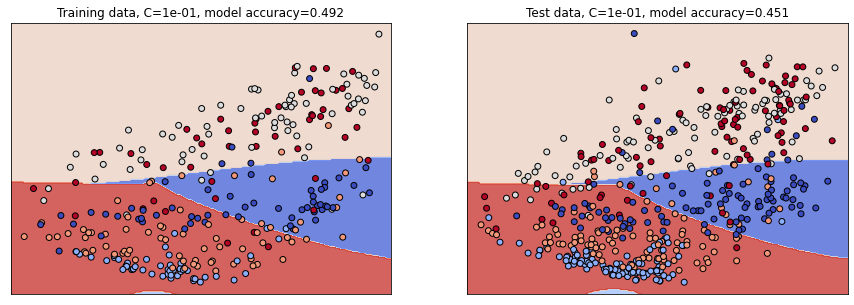

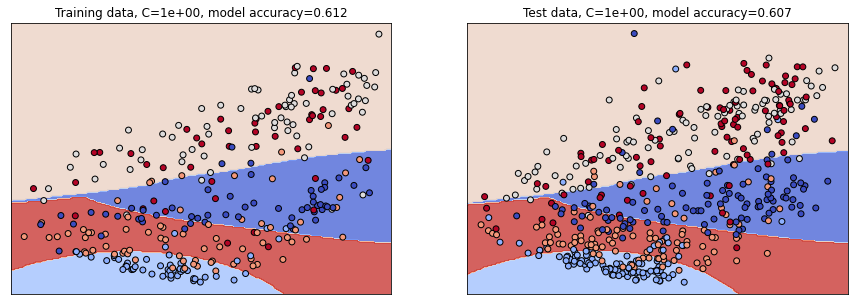

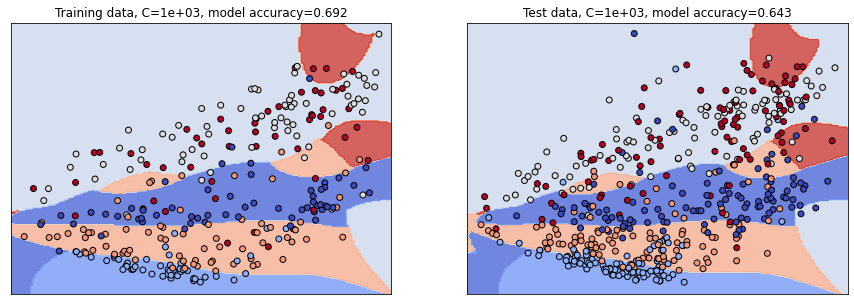

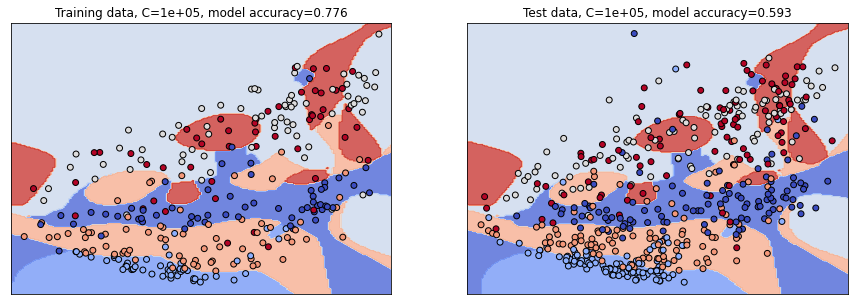

In [14]:
# Too many test samples for visualization, plot only some of them
m_test = 1000
p = np.random.permutation(X_test.shape[0])[:m_test]
X_test_red, y_test_red = X_test[p,:], y_test[p]

# Perform classification only on subset of original classes for better visualization

class_list = [0,1,2,3,4] #YOU CAN TRY TO CHANGE THE CLASSES

train_idxs = [i for i in range(len(y_train)) if y_train[i] in class_list]   
test_idxs = [i for i in range(len(y_test_red)) if y_test_red[i] in class_list] 
X_train_plot = X_train[train_idxs,:]
X_test_plot = X_test_red[test_idxs,:] 
y_train_plot = y_train[train_idxs]
y_test_plot = y_test_red[test_idxs] 


# The dimensionality is reduced to 2 for visualization using PCA
# PCA: Reduce the dimensionality trying to preserve the information content. 
# PCA will be the topic of one of the very last lectures

# Reduce X dimensionality to 2 for visualization
pca = PCA(n_components=2, svd_solver='randomized', whiten=True).fit(X_train)
X_train_pca, X_test_pca = pca.transform(X_train_plot), pca.transform(X_test_plot)


C_list = [1e-1, 1, 1e3, 1e5]
gamma = 0.5

# Fit the prediction model on train_plot data futher reduced with PCA, 
# then classify with different prediction models and plot data
# Use RBF kernel 

for C in C_list:
    my_svm = GridSearchCV(estimator=SVC(kernel='rbf'), param_grid={'C':[C] , 'gamma':[0.5]}, cv=4)  #ADD CODE
    
    # ADD CODE TO TRAIN SVM (use the PCA reduced data)
    my_svm.fit(X_train_pca,y_train_plot)
    
     #ADD CODE FOR TO COMPUTE TRAIN AND TEST ERROR
    train_error = 1-my_svm.best_estimator_.score(X_train_pca,y_train_plot)
    test_error= 1-my_svm.best_estimator_.score(X_test_pca,y_test_plot)  #1-score o solo score?
    
    plot_data(my_svm, X_train_pca, y_train_plot, X_test_pca, y_test_plot, train_error, test_error, C)
    #modified adding C in order to print the plot title (was getting an error)


## QUESTION 2
How do the shape of the boundaries changes when trying different values of C ?

When trying different values of C, the shape of the boundaries will change due to change of the margin; the parameter C controls the trade off between correct classification of training examples and maximization of the margin. For a large value of C the optimization will choose a smaller margin hyperplane if the decision function is better at classifying all training points correctly. On the contrary with small value of C we’ll get a larger margin separating hyperplane, even if that hyperplane misclassifies more point, therefore we have a simpler decision function. <br>

With lower values of C the model accuracy is in fact worse e.g. C=1e-01, model accuracy= 0.492. 
In our case, the best C is C=1e+03 because we get a higher model accuracy in the test set, model accuracy=0.643, even if the training model accuracy isn't the highest one. 

## TO DO 7

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [15]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


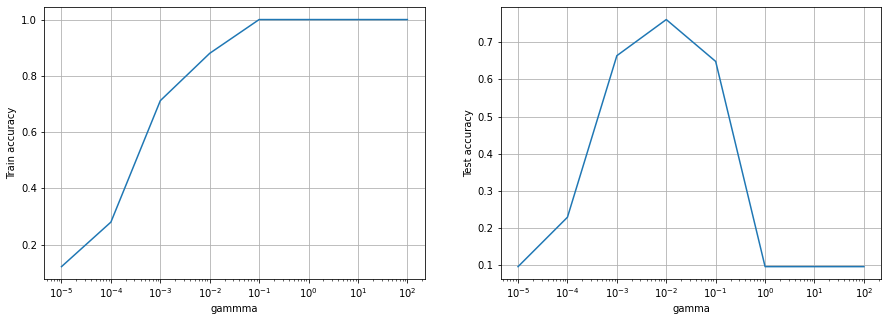

In [16]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS
#(use original x,y )

for gamma in gamma_values:
    svm_gamma = GridSearchCV(estimator=SVC(kernel='rbf'), param_grid={'C':[1] , 'gamma':[gamma]}, cv=4)  #ADD CODE
    
    svm_gamma.fit(X_train,y_train) 
     
    train_acc_list.append(svm_gamma.best_estimator_.score(X_train,y_train)) 
    test_acc_list.append(svm_gamma.best_estimator_.score(X_test,y_test))  
    

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gammma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 3
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.


When changing gamma the training error improves with higher values of gamma and even goes to zero, while the test error decreases with higher values of gamma until a certain point, then it gets worse. The trend of the test error is connected to the problem of overfitting: an higher value of gamma means that the hyperplane will try to match more and more the training data, leading to overfitting. With lower values of gamma we are instead in the opposite situation, with the risk of underfitting. The key is to find the optimal value of gamma that will lead to avoid the two extreme cases (overfitting and underfitting). <br>

In our case, the best value of gamma is gamma=1.e-02 for which we have the highest value of test accuracy and a training accuracy equal to 0.88, so close to one. <br>
  



## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [17]:
X = X[permutation]
y = y[permutation]

m_training = 1500 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [138 157 140 138 160 178 164 136 154 135]


## TO DO 8

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  1500$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [18]:
#get training and test error for the best SVM model from CV

best_SVM_moresample = GridSearchCV(estimator=svc_g, param_grid={'C': [5], 'gamma': [0.005]}, cv=4) 
#The best SVM model taken is rbf with {'C': 5, 'gamma': 0.005} as best parameters

best_SVM_moresample.fit(X_train,y_train)

#predic_svm= best_SVM_moresample.predict(X_test)

train_score=best_SVM_moresample.best_estimator_.score(X_train , y_train)
training_error= (1-train_score)


# (error is 1 - svm.score)
test_score=best_SVM_moresample.best_estimator_.score(X_test , y_test)
test_error= (1-test_score)


print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.056667
Best SVM test error: 0.169521


Just for comparison, let's also use logistic regression 

## TO DO 9 Try first without regularization (use a very large large C)¶

In [19]:
from sklearn import linear_model

# ADD YOUR CODE

log_reg=linear_model.LogisticRegression(C=1e5, max_iter=800) #use a very large C
#increased the number of iterations because it was giving a "failed to converge warning"

#training set
training_reg=log_reg.fit(X_train, y_train) #learn
training_pred=log_reg.predict(X_train) #predict
training_score=log_reg.score(X_train, y_train)
training_error=1-training_score

#test set
#pred_testCl = log_reg.predict(X_test)
test_score=log_reg.score(X_test,y_test)
test_error=1-test_score


print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.215709


## TO DO 10 Try  with regularization (use C=1)¶

In [20]:
# ADD YOUR CODE
log_regC=linear_model.LogisticRegression(C=1,max_iter=800) 
#increased the number of iterations because it was giving a "failed to converge warning"

#training set
training_reg=log_regC.fit(X_train, y_train) #learn
training_pred=log_regC.predict(X_train) #predict
training_score=log_regC.score(X_train, y_train)
training_error=1-training_score

#test set
#pred_testCs = log_regC.predict(X_test)
test_score=log_regC.score(X_test,y_test)
test_error=1-test_score

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.006000
Best regularized logistic regression test error: 0.193624


## QUESTION 4
Compare and discuss:
- the results from SVM with m=600 and with m=1500 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression


1) The results from SVM  training data points in the two cases are: <br>

- m=600 <br>
Best SVM training error: 0.056667  <br>
Best SVM test error: 0.202750  <br>

- m=1500 <br>
 Best SVM training error: 0.056667  <br>
Best SVM test error: 0.169521 <br>

From this results we can see that there is a difference in the test error: with m=600 the test error is equal to 20% while, with m=1500, it’s equal to 17%. The fact that the test error is lower, in the second case, is due to the increased number of samples in the training set.  <br>

2) The results of SVM and of Logistic Regression:

- SVM  <br>
Best SVM training error: 0.056667  <br>
Best SVM test error: 0.169521 <br>
- Logistic Regression  with a very large C  <br> 
Best logistic regression training error: 0.000000 <br>
Best logistic regression test error: 0.215709 <br> 
- Logistic Regression  with regularization C=1 <br>
Best regularized logistic regression training error: 0.006000 <br>
Best regularized logistic regression test error: 0.193624 <br>

With Logistic Regression we obtain a better results using C=1, so in the case of regularization: the test  error  is equal to 19%  compared to  22% of the case with a very large C. 
However the SVM gives a better result with a test error of 17% compared to the 19% of the better one of Logistic Regression. 


## TO DO 11
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

In [21]:
LR_prediction = log_regC.predict(X_test) #ADD CODE
SVM_prediction = best_SVM_moresample.predict(X_test) # ADD CODE

INPUT:


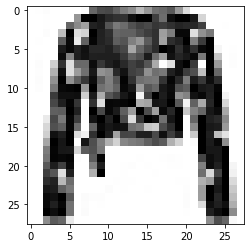

LABEL: 6
Index of the first missclassified item by logistic regression and correctly classified by SVM: 16
Missclassified by logistic regression as label: 2


In [22]:
#item misscl by logistic and correctly class. by SVM
for i in range(0,len(y_test)):
    if y_test[i] != LR_prediction[i] and y_test[i] == SVM_prediction[i]:
        plot_input(X_test,y_test,i)
        print("Index of the first missclassified item by logistic regression and correctly classified by SVM:", i)
        print("Missclassified by logistic regression as label:", LR_prediction[i])
        break
    



## TO DO 12
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [23]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = skm.confusion_matrix(y_test,SVM_prediction) 
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )


confusion_LR = skm.confusion_matrix(y_test, LR_prediction) 
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )



Labels and frequencies in test set:  [5862 5843 5860 5862 5840 5822 5836 5864 5846 5865]

 Confusion matrix SVM  
 
 [[4863    8   43  313   24   11  545    0   54    1]
 [  24 5558   23  195    4    1   37    0    1    0]
 [ 177    6 4015   56  804    4  763    0   35    0]
 [ 255   30   24 5092  120    1  329    0   11    0]
 [  18    7  487  386 4233    4  684    0   20    1]
 [   3    0    0    2    0 5222    2  456   31  106]
 [1047    5  601  186  491    6 3410    1   88    1]
 [   0    0    0    0    0  283    0 5263    8  310]
 [  54    6   64   34   29   50   91   29 5480    9]
 [   0    0    0    1    1  138    1  275    2 5447]]

 Confusion matrix SVM (normalized)   
 
 [[0.83 0.   0.01 0.05 0.   0.   0.09 0.   0.01 0.  ]
 [0.   0.95 0.   0.03 0.   0.   0.01 0.   0.   0.  ]
 [0.03 0.   0.69 0.01 0.14 0.   0.13 0.   0.01 0.  ]
 [0.04 0.01 0.   0.87 0.02 0.   0.06 0.   0.   0.  ]
 [0.   0.   0.08 0.07 0.72 0.   0.12 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.9  0.   0.08 0.0

In [24]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX

#The code above already prints out the not normalized and normalized matrix in both cases.
#However we can directly obtain the not normalized or normalized by inserting in the function:

#sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
#normalize=None  to get the not normalized matrix
#normalize='true' to ge the normalized matrix

confusion_SVM = skm.confusion_matrix(y_test,SVM_prediction,normalize=None) 
print("\n Confusion matrix SVM  \n \n", confusion_SVM)

confusion_SVM = skm.confusion_matrix(y_test,SVM_prediction,normalize='true') 
print("\n Confusion matrix SVM normalized  \n \n", confusion_SVM)



 Confusion matrix SVM  
 
 [[4863    8   43  313   24   11  545    0   54    1]
 [  24 5558   23  195    4    1   37    0    1    0]
 [ 177    6 4015   56  804    4  763    0   35    0]
 [ 255   30   24 5092  120    1  329    0   11    0]
 [  18    7  487  386 4233    4  684    0   20    1]
 [   3    0    0    2    0 5222    2  456   31  106]
 [1047    5  601  186  491    6 3410    1   88    1]
 [   0    0    0    0    0  283    0 5263    8  310]
 [  54    6   64   34   29   50   91   29 5480    9]
 [   0    0    0    1    1  138    1  275    2 5447]]

 Confusion matrix SVM normalized  
 
 [[0.83 0.   0.01 0.05 0.   0.   0.09 0.   0.01 0.  ]
 [0.   0.95 0.   0.03 0.   0.   0.01 0.   0.   0.  ]
 [0.03 0.   0.69 0.01 0.14 0.   0.13 0.   0.01 0.  ]
 [0.04 0.01 0.   0.87 0.02 0.   0.06 0.   0.   0.  ]
 [0.   0.   0.08 0.07 0.72 0.   0.12 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.9  0.   0.08 0.01 0.02]
 [0.18 0.   0.1  0.03 0.08 0.   0.58 0.   0.02 0.  ]
 [0.   0.   0.   0.   0.   0.05

## QUESTION 5
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.

In general the confusion matrix C is a NxN matrix, with N equal to the classes that we are classifying, that evaluates the accuracy of the classification performed. An element of the matrix Cij is equal to the number of observations known to be i-labeled and predicted as a j-label. The diagonal elements represent therefore the number of samples for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. 

In our case, the reason why some classes have lower accuracies and others an higher one could be connected to the fact that some clothing are more similar with each others, and so it’s easier to missclassify them. For example t-shirt (0) and shirt (6), or sandals (5) and sneakers (7): in this cases the off-diagonal values Cij, connected to those classes, will be higher. <br>



